In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
model=load_model("LSTM_Downsampling_model.keras")

In [3]:
df1 = pd.read_csv('./downsampled_data.csv')

In [4]:
x=df1.drop('Class',axis=1)
y=df1['Class']

In [5]:
print(x.iloc[0])

Time      82450.000000
V1            1.314539
V2            0.590643
V3           -0.666593
V4            0.716564
V5            0.301978
V6           -1.125467
V7            0.388881
V8           -0.288390
V9           -0.132137
V10          -0.597739
V11          -0.325347
V12          -0.216435
V13           0.084204
V14          -1.054631
V15           0.967932
V16           0.601226
V17           0.631117
V18           0.295078
V19          -0.136151
V20          -0.058040
V21          -0.170307
V22          -0.429655
V23          -0.141341
V24          -0.200195
V25           0.639491
V26           0.399476
V27          -0.034321
V28           0.031692
Amount        0.760000
Name: 0, dtype: float64


In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)

In [7]:
print(len(x))
print(len(y))

984
984


In [8]:
print(x[0])

[4.78359989e-01 9.68473648e-01 2.95234113e-01 8.88750176e-01
 3.14777939e-01 6.74912375e-01 4.09987799e-01 8.90322507e-01
 6.67565773e-01 7.12613976e-01 7.06118536e-01 1.42843462e-01
 8.95955197e-01 5.29567673e-01 8.01513763e-01 7.84309812e-01
 8.53010921e-01 8.08531360e-01 7.36983829e-01 3.97941102e-01
 3.35878838e-01 4.52541922e-01 4.90310219e-01 7.56558910e-01
 6.52225794e-01 7.75570920e-01 4.02201369e-01 7.00782608e-01
 5.21009314e-01 3.57500694e-04]


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
y_test.value_counts()

Class
0    126
1    120
Name: count, dtype: int64

In [11]:
print(x_test.shape,y_test.shape)

(246, 30) (246,)


In [12]:
r,c=x_test.shape
x_test=x_test.reshape(r,c,1)

In [13]:
y_test_pred=model.predict(x_test)

8/8 [==============================] - 2s 23ms/step


In [14]:
y_test_pred=(y_test_pred>0.5).astype(int)

In [15]:
print("Accuracy on Training Data : ",accuracy_score(y_test,y_test_pred))

Accuracy on Training Data :  0.926829268292683


In [16]:
print("Classification Report :\n",classification_report(y_test_pred,y_test))

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       132
           1       0.90      0.95      0.92       114

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246



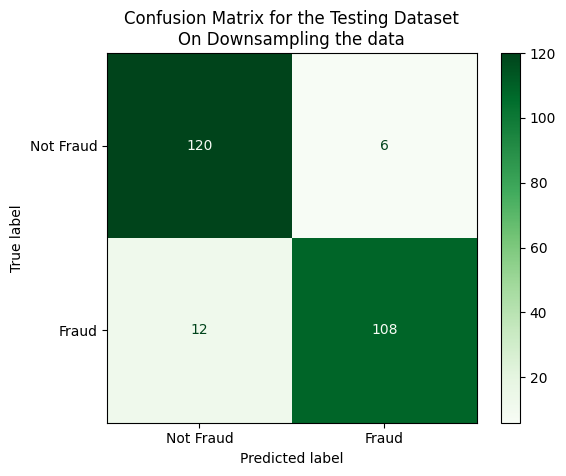

In [17]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix for the Testing Dataset\nOn Downsampling the data')
plt.show();